In [1]:
import pandas as pd
import numpy as np

In [2]:
ighv = pd.read_csv('IGHV1-2_usage.csv')

In [3]:
ighv.head(10)

,SubjectID,Haplotype,Usage
0,1,2-6,0.106471
1,2,4,0.022486
2,3,2-6,0.075551
3,4,4,0.046183
4,5,4-6,0.059380
5,6,2-4,0.068115
6,7,2-6,0.047973
7,8,2-4,0.014097
8,9,2-4,0.088681
9,10,2-4,0.093654


In [4]:
ighv.SubjectID.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85])

In [5]:
ighv.Haplotype.unique()

array(['2-6', '4', '4-6', '2-4', '2', '6'], dtype=object)


#Problem 2
##Haplotype Individual Counts

In [6]:
ighv.groupby('Haplotype')['SubjectID'].count()

Haplotype
2      17
2-4    28
2-6     6
4      18
4-6    14
6       2
Name: SubjectID, dtype: int64

In [7]:
ighv.shape

(85, 3)

In [8]:
ighv.groupby('Haplotype')['Usage'].mean()

Haplotype
2      0.086191
2-4    0.077451
2-6    0.086956
4      0.027895
4-6    0.071032
6      0.069571
Name: Usage, dtype: float64

In [9]:
ighv['Haplotype'].unique()[0]

'2-6'

In [10]:
ighv[ighv['Haplotype'] == ighv['Haplotype'].unique()[0]]

,SubjectID,Haplotype,Usage
0,1,2-6,0.106471
2,3,2-6,0.075551
6,7,2-6,0.047973
28,29,2-6,0.084664
29,30,2-6,0.115369
44,45,2-6,0.091705


In [37]:
parents = ighv[ighv['Haplotype'].isin(['2', '4', '6'])]
parents.head(10)

,SubjectID,Haplotype,Usage
1,2,4,0.022486
3,4,4,0.046183
11,12,2,0.076245
12,13,2,0.072067
15,16,4,0.052391
17,18,2,0.047258
21,22,4,0.009615
22,23,6,0.099498
24,25,2,0.087990
25,26,4,0.030942


In [15]:
from scipy.stats import f_oneway
from statsmodels.sandbox.stats.multicomp import multipletests

In [52]:
pvals = []
leftHaplotype = []
rightHaplotype = []
sig = []

for i in range(parents['Haplotype'].nunique()):
  for j in range(i, parents['Haplotype'].nunique()):       
    if str(parents['Haplotype'].unique()[i]) != str(parents['Haplotype'].unique()[j]):
      h1_df = parents[parents['Haplotype'] == parents['Haplotype'].unique()[i]]
      h2_df = parents[parents['Haplotype'] == parents['Haplotype'].unique()[j]]
      F, p = f_oneway(h1_df['Usage'], h2_df['Usage'])
      lht = parents['Haplotype'].unique()[i]
      rht = parents['Haplotype'].unique()[j]
      leftHaplotype.append(lht)
      rightHaplotype.append(rht)
      pvals.append(p)
      if p < 0.05:
        sig.append('Y')
      else:
        sig.append('N')
pval_df = pd.DataFrame({'haplotype1': leftHaplotype, 'haplotype2': rightHaplotype, 'pval': pvals, 'uncorrected_stat_sig': sig}).sort_values(['haplotype1', 'haplotype2', 'pval'])

In [53]:
pval_df['bonferroni'] = multipletests(pval_df['pval'], alpha=0.05, method='bonferroni')[1]

In [54]:
corrected_stat_sig = []
for p in pval_df['bonferroni']:
  if p < 0.05:
    corrected_stat_sig.append('Y')
  else:
    corrected_stat_sig.append('N')

In [55]:
pval_df['corrected_stat_sig'] = corrected_stat_sig
pval_df

,haplotype1,haplotype2,pval,uncorrected_stat_sig,bonferroni,corrected_stat_sig
2,2,6,3.848618e-01,N,1.000000e+00,N
0,4,2,2.145209e-10,Y,6.435627e-10,Y
1,4,6,3.904056e-03,Y,1.171217e-02,Y


#Problem 3
##Pvalue Table

In [57]:
pvals = []
leftHaplotype = []
rightHaplotype = []
sig = []

for i in range(ighv['Haplotype'].nunique()):
  for j in range(i, ighv['Haplotype'].nunique()):       
    if str(ighv['Haplotype'].unique()[i]) != str(ighv['Haplotype'].unique()[j]):
      h1_df = ighv[ighv['Haplotype'] == ighv['Haplotype'].unique()[i]]
      h2_df = ighv[ighv['Haplotype'] == ighv['Haplotype'].unique()[j]]
      F, p = f_oneway(h1_df['Usage'], h2_df['Usage'])
      lht = ighv['Haplotype'].unique()[i]
      rht = ighv['Haplotype'].unique()[j]
      leftHaplotype.append(lht)
      rightHaplotype.append(rht)
      pvals.append(p)
      if p < 0.05:
        sig.append('Y')
      else:
        sig.append('N')
pval_df = pd.DataFrame({'haplotype1': leftHaplotype, 'haplotype2': rightHaplotype, 'pval': pvals, 'uncorrected_stat_sig': sig}).sort_values(['haplotype1', 'haplotype2', 'pval'])
pval_df['bonferroni'] = multipletests(pval_df['pval'], alpha=0.05, method='bonferroni')[1]

In [58]:
corrected_stat_sig = []
for p in pval_df['bonferroni']:
  if p < 0.05:
    corrected_stat_sig.append('Y')
  else:
    corrected_stat_sig.append('N')

pval_df['corrected_stat_sig'] = corrected_stat_sig

In [59]:
pval_df

,haplotype1,haplotype2,pval,uncorrected_stat_sig,bonferroni,corrected_stat_sig
14,2,6,3.848618e-01,N,1.000000e+00,N
12,2-4,2,2.624716e-01,N,1.000000e+00,N
13,2-4,6,6.899601e-01,N,1.000000e+00,N
3,2-6,2,9.461275e-01,N,1.000000e+00,N
2,2-6,2-4,4.161317e-01,N,1.000000e+00,N
0,2-6,4,1.868067e-07,Y,2.802100e-06,Y
1,2-6,4-6,2.625689e-01,N,1.000000e+00,N
4,2-6,6,4.736868e-01,N,1.000000e+00,N
7,4,2,2.145209e-10,Y,3.217813e-09,Y
6,4,2-4,2.829361e-09,Y,4.244042e-08,Y


In [14]:
pval_df[pval_df['stat_sig'] == 'Y']

,haplotype1,haplotype2,pval,stat_sig
0,2-6,4,1.868067e-07,Y
7,4,2,2.145209e-10,Y
6,4,2-4,2.829361e-09,Y
5,4,4-6,6.579081e-06,Y
8,4,6,3.904056e-03,Y


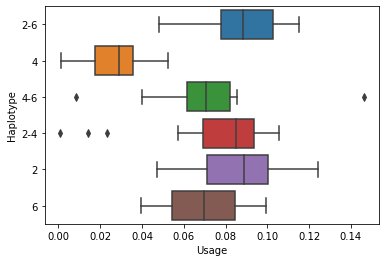

In [61]:
import seaborn as sns
_ = sns.boxplot(data=ighv, x='Usage', y='Haplotype')

In [62]:
seqs = pd.read_csv('clustal_output_10_8.csv', header=None, sep=' +').sort_values(0)
seqs

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2
1,IGHV1-2*02,caggtgcagctggtgcagtctggggctgaggtgaagaagcctgggg...,60
4,IGHV1-2*02,tcctgcaaggcttctggatacaccttcaccggctactatatgcact...,120
7,IGHV1-2*02,cctggacaagggcttgagtggatgggatggatcaaccctaacagtg...,180
10,IGHV1-2*02,gcacagaagtttcagggcagggtcaccatgaccagggacacgtcca...,240
13,IGHV1-2*02,atggagctgagcaggctgagatctgacgacacggccgtgtattact...,296
2,IGHV1-2*04,caggtgcagctggtgcagtctggggctgaggtgaagaagcctgggg...,60
5,IGHV1-2*04,tcctgcaaggcttctggatacaccttcaccggctactatatgcact...,120
8,IGHV1-2*04,cctggacaagggcttgagtggatgggatggatcaaccctaacagtg...,180
11,IGHV1-2*04,gcacagaagtttcagggctgggtcaccatgaccagggacacgtcca...,240
14,IGHV1-2*04,atggagctgagcaggctgagatctgacgacacggccgtgtattact...,296


In [63]:
seqs[0].values[0]

'IGHV1-2*02'

In [64]:
seqs[seqs[0] == 'IGHV1-2*02']

,0,1,2
1,IGHV1-2*02,caggtgcagctggtgcagtctggggctgaggtgaagaagcctgggg...,60
4,IGHV1-2*02,tcctgcaaggcttctggatacaccttcaccggctactatatgcact...,120
7,IGHV1-2*02,cctggacaagggcttgagtggatgggatggatcaaccctaacagtg...,180
10,IGHV1-2*02,gcacagaagtttcagggcagggtcaccatgaccagggacacgtcca...,240
13,IGHV1-2*02,atggagctgagcaggctgagatctgacgacacggccgtgtattact...,296


In [65]:
seqs[seqs[0] == 'IGHV1-2*04']

,0,1,2
2,IGHV1-2*04,caggtgcagctggtgcagtctggggctgaggtgaagaagcctgggg...,60
5,IGHV1-2*04,tcctgcaaggcttctggatacaccttcaccggctactatatgcact...,120
8,IGHV1-2*04,cctggacaagggcttgagtggatgggatggatcaaccctaacagtg...,180
11,IGHV1-2*04,gcacagaagtttcagggctgggtcaccatgaccagggacacgtcca...,240
14,IGHV1-2*04,atggagctgagcaggctgagatctgacgacacggccgtgtattact...,296


In [66]:
seqs[seqs[0] == 'IGHV1-2*06']

,0,1,2
0,IGHV1-2*06,caggtgcagctggtgcagtctggggctgaggtgaagaagcctgggg...,60
3,IGHV1-2*06,tcctgcaaggcttctggatacaccttcaccggctactatatgcact...,120
6,IGHV1-2*06,cctggacaagggcttgagtggatgggacggatcaaccctaacagtg...,180
9,IGHV1-2*06,gcacagaagtttcagggcagggtcaccatgaccagggacacgtcca...,240
12,IGHV1-2*06,atggagctgagcaggctgagatctgacgacacggccgtgtattact...,296


In [67]:
seqs[seqs[0] == 'IGHV1-2*02'][1].values[3] == seqs[seqs[0] == 'IGHV1-2*04'][1].values[3]

False

In [68]:
ighv.columns

Index(['SubjectID', 'Haplotype', 'Usage'], dtype='object')

In [69]:
ighv.head()

,SubjectID,Haplotype,Usage
0,1,2-6,0.106471
1,2,4,0.022486
2,3,2-6,0.075551
3,4,4,0.046183
4,5,4-6,0.059380


In [70]:
ighv[ighv['Haplotype'].isin(['2-4', '2-6', '2', '4'])]

,SubjectID,Haplotype,Usage
0,1,2-6,0.106471
1,2,4,0.022486
2,3,2-6,0.075551
3,4,4,0.046183
5,6,2-4,0.068115
...,...,...,...
79,80,2-4,0.057033
80,81,2,0.053374
81,82,2-4,0.091584
82,83,2,0.099734


In [71]:
snp1 = ighv.copy()
snp2 = ighv.copy()
snp1.shape

(85, 3)

#Problem 4
##SNP List

In [72]:
# Position 208 haplotype 2-4 in state t, mutation c in haplotype 6
# (t, 208)

# Position 259 haplotype 2-6 in state a, mutation t in haplotype 4
# (a, 259)

In [73]:
snp1['SNP1_State'] = 'Nan'
snp1.loc[snp1['Haplotype'] == '2-4', 'SNP1_State'] = 't'
snp1.loc[snp1['Haplotype'] == '2-6', 'SNP1_State'] = 't/c'
snp1.loc[snp1['Haplotype'] == '2', 'SNP1_State'] = 't'
snp1.loc[snp1['Haplotype'] == '4', 'SNP1_State'] = 't'
snp1.loc[snp1['Haplotype'] == '6', 'SNP1_State'] = 'c'
snp1.loc[snp1['Haplotype'] == '4-6', 'SNP1_State'] = 't/c'

snp2['SNP2_State'] = 'Nan'
snp2.loc[snp2['Haplotype'] == '2-6', 'SNP2_State'] = 'a'
snp2.loc[snp2['Haplotype'] == '2-4', 'SNP2_State'] = 'a/t'
snp2.loc[snp2['Haplotype'] == '4', 'SNP2_State'] = 't'
snp2.loc[snp2['Haplotype'] == '2', 'SNP2_State'] = 'a'
snp2.loc[snp2['Haplotype'] == '6', 'SNP2_State'] = 'a'
snp2.loc[snp2['Haplotype'] == '4-6', 'SNP2_State'] = 'a/t'

#Problem 5
##SNP State Tables

In [74]:
snp1.sort_values('Haplotype')[['Haplotype', 'Usage','SNP1_State']]
# 2=t, 4=t, 6=c -> 2-4=t, 2-6=t/c, 4-6=t/c 
# 2=a, 6=a, 4=t -> 2-6=a, 2-4=a/t, 4-6=a/t

,Haplotype,Usage,SNP1_State
32,2,0.071203,t
56,2,0.088773,t
17,2,0.047258,t
31,2,0.108313,t
24,2,0.087990,t
...,...,...,...
65,4-6,0.008325,t/c
64,4-6,0.083474,t/c
18,4-6,0.060106,t/c
40,6,0.039645,c


In [75]:
snp1[snp1['Haplotype'].isin(['2-6', '4-6','6'])].sort_values('Haplotype')

,SubjectID,Haplotype,Usage,SNP1_State
0,1,2-6,0.106471,t/c
2,3,2-6,0.075551,t/c
6,7,2-6,0.047973,t/c
28,29,2-6,0.084664,t/c
29,30,2-6,0.115369,t/c
44,45,2-6,0.091705,t/c
69,70,4-6,0.146362,t/c
65,66,4-6,0.008325,t/c
64,65,4-6,0.083474,t/c
57,58,4-6,0.085716,t/c


In [76]:
snp2.sort_values('Haplotype')[['Haplotype', 'Usage','SNP2_State']]

,Haplotype,Usage,SNP2_State
32,2,0.071203,a
56,2,0.088773,a
17,2,0.047258,a
31,2,0.108313,a
24,2,0.087990,a
...,...,...,...
65,4-6,0.008325,a/t
64,4-6,0.083474,a/t
18,4-6,0.060106,a/t
40,6,0.039645,a


In [81]:
snp_states = pd.merge(snp1, snp2, how='inner', left_on=['SubjectID', 'Haplotype', 'Usage'], right_on=['SubjectID', 'Haplotype', 'Usage'])
snp_states[['Haplotype', 'Usage', 'SNP1_State', 'SNP2_State']].sort_values('Haplotype')

,Haplotype,Usage,SNP1_State,SNP2_State
32,2,0.071203,t,a
56,2,0.088773,t,a
17,2,0.047258,t,a
31,2,0.108313,t,a
24,2,0.087990,t,a
...,...,...,...,...
65,4-6,0.008325,t/c,a/t
64,4-6,0.083474,t/c,a/t
18,4-6,0.060106,t/c,a/t
40,6,0.039645,c,a


***************************
Position 208 haplotype 2-4 in state t, mutation c in haplotype 6

(t, 208)

******************
Position 259 haplotype 2-6 in state a, mutation t in haplotype 4

(a, 259)

#Problem 6
##ANOVA Pvals
##Boxplots

In [82]:
from scipy.stats import f_oneway
from sklearn import preprocessing
  
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()

snp_states['SNP1_State']= le1.fit_transform(snp_states['SNP1_State'])
snp_states['SNP2_State']= le2.fit_transform(snp_states['SNP2_State'])

F, p = f_oneway(snp_states['Usage'], snp_states['SNP1_State'], snp_states['SNP2_State'])

In [83]:
p

2.5455996241489116e-38

In [85]:
import seaborn as sns

snp_states = pd.merge(snp1, snp2, how='inner', left_on=['SubjectID', 'Haplotype', 'Usage'], right_on=['SubjectID', 'Haplotype', 'Usage'])

In [89]:
snp_states

,SubjectID,Haplotype,Usage,SNP1_State,SNP2_State
0,1,2-6,0.106471,t/c,a
1,2,4,0.022486,t,t
2,3,2-6,0.075551,t/c,a
3,4,4,0.046183,t,t
4,5,4-6,0.059380,t/c,a/t
...,...,...,...,...,...
80,81,2,0.053374,t,a
81,82,2-4,0.091584,t,a/t
82,83,2,0.099734,t,a
83,84,4-6,0.040000,t/c,a/t


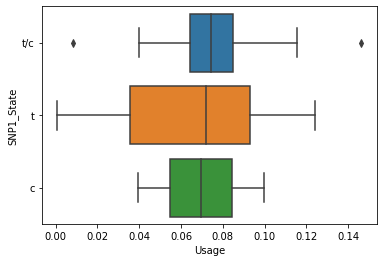

In [87]:
_ = sns.boxplot(data=snp_states, x='Usage', y='SNP1_State')

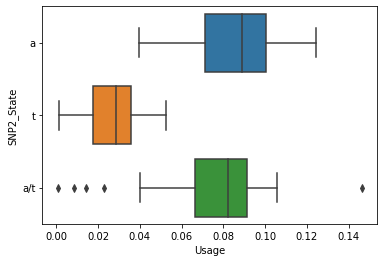

In [ ]:
_ = sns.boxplot(data=snp_states, x='Usage', y='SNP2_State')